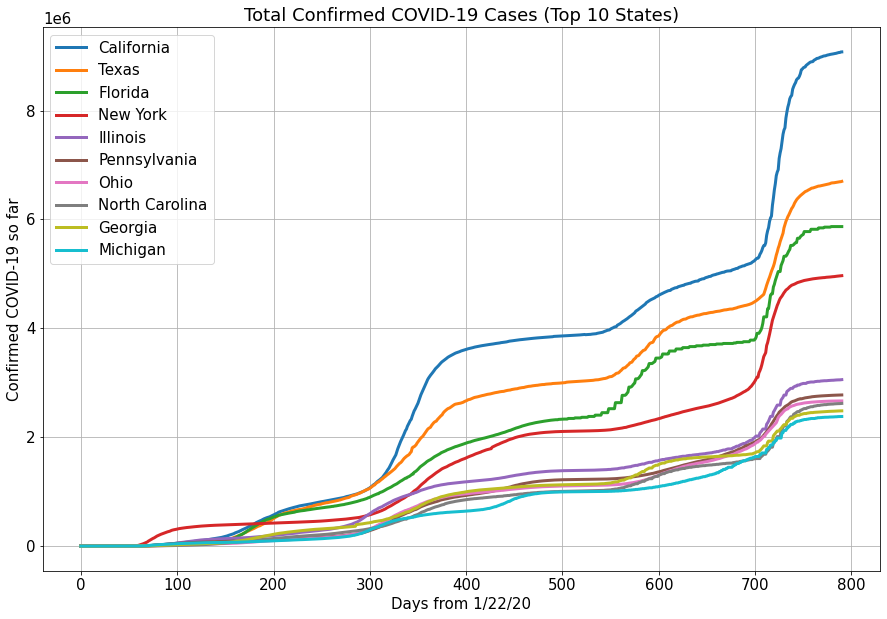

In [24]:
%cd "/content/drive/Othercomputers/MacBook-Air/CSE 847 Machine Learninng/CSE 847 ML Project"
from IPython.display import clear_output
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
clear_output()

import os


df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
df.head()
os.makedirs("plots", exist_ok=True)


selected_columns = df.columns[11:].tolist()





states = list(set(df['Province_State']))
state_stat = {}
state_total = []

for state in states:
# state = "Alabama"
    df_st = df[df['Province_State'] == state]
    total = df_st.sum()[selected_columns].values
    state_stat[state] = total
    state_total.append((state, total[-1]))


# Sorting all the States based on Total Cases so far

def Sort_Tuple(tup, reverse= False): 
    """
    Function to sort a list of touple with second element
    """
    if reverse:
        tup.sort(key = lambda x: x[1], reverse=True)
    else:
        tup.sort(key = lambda x: x[1], reverse=False)

    return tup 
  
# printing the sorted list of tuples
top_states = Sort_Tuple(state_total, reverse=True)


top = 10
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 15
for state, total in top_states[:top]:
    plt.plot(state_stat[state], label=state, linewidth=3)
plt.legend()
plt.title('Total Confirmed COVID-19 Cases (Top 10 States)')
plt.xlabel('Days from 1/22/20')
plt.ylabel("Confirmed COVID-19 so far")
plt.grid()
plt.savefig(f'plots/total_confirmed-top-{top}.png', dpi=200)



In [25]:
df_newcase = df[df.columns[:12]].copy()
for i in range(11, 801):
    today = df.columns[i+1]
    yesterday = df.columns[i]
    df_newcase[today] = df[today] -df[yesterday]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [26]:
states = list(set(df_newcase['Province_State']))
state_stat = {}

for state in states:
# state = "Alabama"
    df_st = df_newcase[df_newcase['Province_State'] == state]
    state_stat[state] = df_st.sum()[selected_columns]

In [27]:
my_data = state_stat["California"]
my_data.index = pd.to_datetime(state_stat["California"].index)

In [28]:
from pandas.plotting import lag_plot, autocorrelation_plot

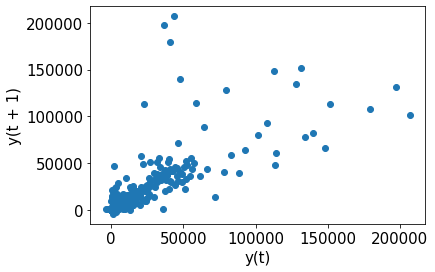

In [29]:
lag_plot(my_data)

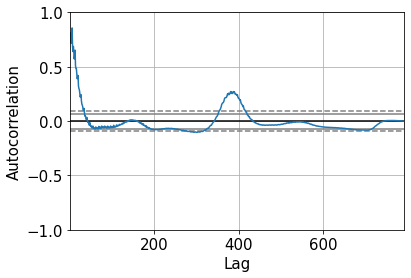

In [30]:
autocorrelation_plot(my_data)
plt.show()

## Persistence Model:

Test MSE: 3277.620


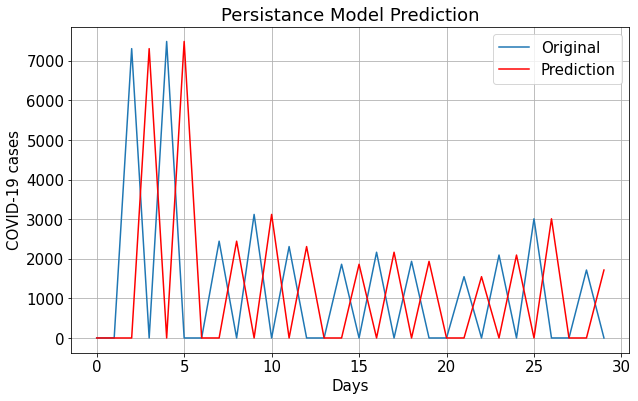

In [48]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error




state = "Michigan"
my_data = state_stat[state]
my_data.index = pd.to_datetime(state_stat[state].index)


series = my_data
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']


# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-30], X[len(X)-30:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = math.sqrt(mean_squared_error(test_y, predictions))
print('Test MSE: %.3f' % test_score)





# plot predictions vs expected
pyplot.figure(figsize=(10,6))
pyplot.plot(test_y, label="Original")
pyplot.plot(predictions[:], color='red', label="Prediction")
pyplot.title("Persistance Model Prediction")
pyplot.xlabel("Days"); pyplot.ylabel("COVID-19 cases")
pyplot.grid()
pyplot.legend()
pyplot.savefig("plots/presistance_model.png", dpi = 200)

In [31]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## AutoRegressive Model

Test RMSE: 2341.678


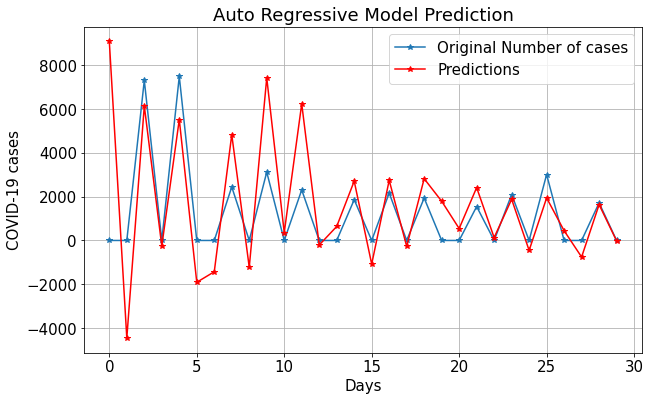

In [49]:
state = "Michigan"
my_data = state_stat[state]
my_data.index = pd.to_datetime(state_stat[state].index)


from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt



# load dataset
series = my_data
# split dataset
X = series.values
test_data_size = 30
train, test = X[1:len(X)-test_data_size], X[len(X)-test_data_size:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
# plot results
pyplot.figure(figsize=(10,6))
pyplot.plot(test, label="Original Number of cases", marker="*")
pyplot.plot(predictions, color='red', label="Predictions", marker = '*')
pyplot.grid()
pyplot.legend()
pyplot.title("Auto Regressive Model Prediction")
pyplot.xlabel("Days"); pyplot.ylabel("COVID-19 cases")
pyplot.savefig("plots/autoregressive-michigan.png", dpi=200)
pyplot.show()

## Basic Linear Regression:

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math


state = "Michigan"
my_data = state_stat[state]
my_data.index = pd.to_datetime(state_stat[state].index)


# load dataset
series = my_data
# split dataset
X = series.values
test_data_size = 50
lags = 7
train, test = X[1:len(X)-test_data_size], X[len(X)-test_data_size:]

X_train, Y_train = [], []
X_test, Y_test = [], []


for i in range(len(train)):
    if (i + lags+1)< len(train):
        X_train.append(train[i:i+lags])
        Y_train.append(train[i+lags+1])


for i in range(len(test)):
    if (i + lags+1)< len(test):
        X_test.append(test[i:i+lags])
        Y_test.append(test[i+lags+1])

X_train = np.array(X_train)
Y_train =np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)



[ 1.90311424e+04 -1.73176863e+03  9.57187918e+03  2.55192249e+03
  1.57567161e+03  9.26215260e+03  3.80477464e+02  9.43344755e+03
 -8.46557561e+02  6.26701692e+03  1.55366600e+03  1.19242139e+03
  5.34908598e+03  5.04242151e+02  5.67768176e+03 -1.37022788e+02
  4.35251473e+03 -3.11969934e+02  1.88923638e+03  1.90052239e+03
  7.38480927e+02  6.97714048e+03 -4.58251072e+02  5.25080040e+03
  7.05631546e+02  7.68579678e+02  2.50027844e+03  3.79654567e+02
  3.00297547e+03  9.04764859e+00  2.10752709e+03  6.96657548e+02
  6.63409132e+02  1.91539572e+03  4.10829361e+02  2.31512182e+03
  7.47511672e+01  1.84937753e+03  6.17405430e+02  7.73195293e+02
  1.62992005e+03  5.45930421e+02]
Test RMSE: 2089.627


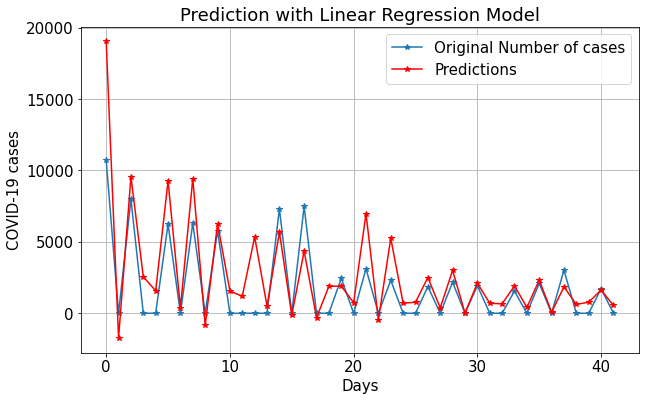

In [50]:
#### Linear Regression ####
model = LinearRegression().fit(X_train, Y_train)
y_predict=model.predict(X_test)
print(y_predict)


rmse = math.sqrt(mean_squared_error(Y_test, y_predict))
print('Test RMSE: %.3f' % rmse)
# plot
# plot results
pyplot.figure(figsize=(10,6))
pyplot.plot(Y_test, label="Original Number of cases", marker="*")
pyplot.plot(y_predict, color='red', label="Predictions", marker = '*')
pyplot.grid()
pyplot.xlabel("Days"); pyplot.ylabel("COVID-19 cases")
pyplot.legend()
pyplot.title("Prediction with Linear Regression Model")
pyplot.savefig("plots/linear_regression_prediction.png", dpi = 200)
pyplot.show()

## ARIMA Model

Test RMSE: 1963.584


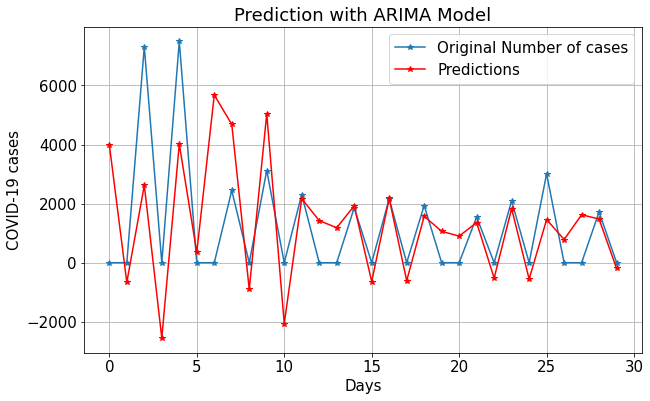

In [53]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]

predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
# plot results
pyplot.figure(figsize=(10,6))
pyplot.plot(test, label="Original Number of cases", marker="*")
pyplot.plot(predictions, color='red', label="Predictions", marker = '*')
pyplot.grid()

pyplot.xlabel("Days"); pyplot.ylabel("COVID-19 cases")
pyplot.legend()
pyplot.title("Prediction with ARIMA Model")
pyplot.savefig("plots/arima-model-output.png", dpi = 200)
pyplot.show()

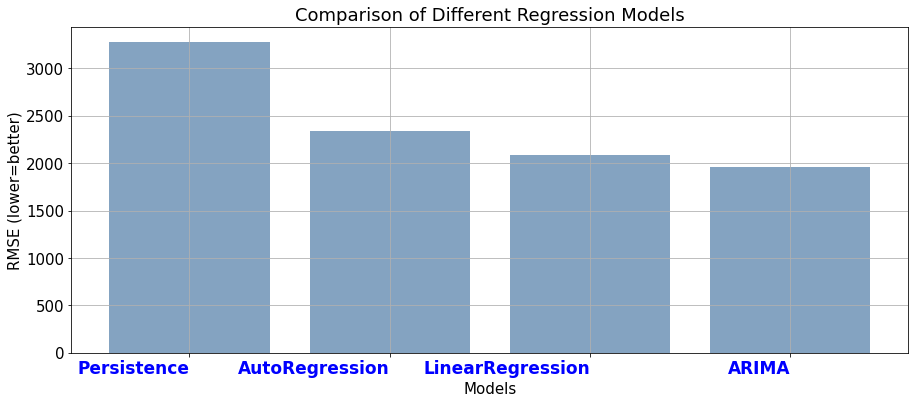

In [71]:

# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Data set
height = [3277, 2341, 2089, 1963]
bars = ('Persistence', 'AutoRegression', 'LinearRegression', 'ARIMA')
y_pos = np.arange(len(bars))

# Basic plot
plt.figure(figsize=(15,6))
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
 
# use the plt.xticks function to custom labels
plt.xticks(y_pos, bars, color='blue', rotation=0, fontweight='bold', fontsize='17', horizontalalignment='right')
plt.grid()
plt.ylabel("RMSE (lower=better)")
plt.xlabel("Models")
plt.title("Comparison of Different Regression Models")
pyplot.savefig("plots/comparison.png", dpi = 200)
plt.show()
